# Plotting Reward Curves

This notebook contains the code we used to plot our reward curves, given data sourced from Tensorboard log files.

## Cleaning the data

Unfortunately, some of our log files were partially corrupted due to crashes, which reset the number of timesteps for the reward data. This required some additional cleaning to select only the data corresponding to runs which did not crash.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [2]:
rewards_df = pd.read_csv("./mean_rewards_transfer.csv")
rewards_df

,Wall time,Step,Value
0,1670458488,878142,1.093308
1,1670460773,1378142,0.481792
2,1670463701,1878142,1.391960
3,1670470376,2570413,2.274703
4,1670473077,3070413,0.205336
...,...,...,...
250,1671203200,108366874,1.532439
251,1671204971,108866874,1.986574
252,1671206739,109366874,1.360753
253,1671208509,109866874,1.764322


In [3]:
rewards_df = rewards_df.drop_duplicates(subset=["Step"], keep="last")
rewards_df

,Wall time,Step,Value
0,1670458488,878142,1.093308
1,1670460773,1378142,0.481792
2,1670463701,1878142,1.391960
9,1670490718,2570413,1.476466
10,1670492519,3070413,1.419001
...,...,...,...
250,1671203200,108366874,1.532439
251,1671204971,108866874,1.986574
252,1671206739,109366874,1.360753
253,1671208509,109866874,1.764322


In [4]:
rewards_df["Step"].is_monotonic_increasing

False

In [5]:
prev = rewards_df["Step"].iloc[-1]
print(prev)
row_list = []
for index, row in rewards_df[::-1].iterrows():
    if row["Step"] < prev:
        row_list.append(row)
        prev = row["Step"]
rewards_df = pd.DataFrame(reversed(row_list))
rewards_df.reset_index(drop=True, inplace=True)
rewards_df

110366874


,Wall time,Step,Value
0,1.670458e+09,878142.0,1.093308
1,1.670461e+09,1378142.0,0.481792
2,1.670464e+09,1878142.0,1.391960
3,1.670491e+09,2570413.0,1.476466
4,1.670493e+09,3070413.0,1.419001
...,...,...,...
207,1.671201e+09,107866874.0,1.459240
208,1.671203e+09,108366874.0,1.532439
209,1.671205e+09,108866874.0,1.986574
210,1.671207e+09,109366874.0,1.360753


In [6]:
rewards_df["Step"].is_monotonic_increasing

True

## Plotting the first reward curve (transfer learning)

In [7]:
# Add column for which problem setting
settings = ["Setting 1 (deterministic)" if index < 97 else "Setting 2 (stochastic)" for index, _ in rewards_df.iterrows()]
rewards_df_with_settings = rewards_df.copy()
rewards_df_with_settings.insert(3, "Setting", settings)
rewards_df_with_settings

,Wall time,Step,Value,Setting
0,1.670458e+09,878142.0,1.093308,Setting 1 (deterministic)
1,1.670461e+09,1378142.0,0.481792,Setting 1 (deterministic)
2,1.670464e+09,1878142.0,1.391960,Setting 1 (deterministic)
3,1.670491e+09,2570413.0,1.476466,Setting 1 (deterministic)
4,1.670493e+09,3070413.0,1.419001,Setting 1 (deterministic)
...,...,...,...,...
207,1.671201e+09,107866874.0,1.459240,Setting 2 (stochastic)
208,1.671203e+09,108366874.0,1.532439,Setting 2 (stochastic)
209,1.671205e+09,108866874.0,1.986574,Setting 2 (stochastic)
210,1.671207e+09,109366874.0,1.360753,Setting 2 (stochastic)


c:\Users\ryanb\OneDrive\Documents\Ryan\School\College 4th Year\Reinforcement Learning\Final Project\.venv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(-20000000.0, 0, '-20.0M'),
 Text(0.0, 0, '0.0M'),
 Text(20000000.0, 0, '20.0M'),
 Text(40000000.0, 0, '40.0M'),
 Text(60000000.0, 0, '60.0M'),
 Text(80000000.0, 0, '80.0M'),
 Text(100000000.0, 0, '100.0M'),
 Text(120000000.0, 0, '120.0M')]

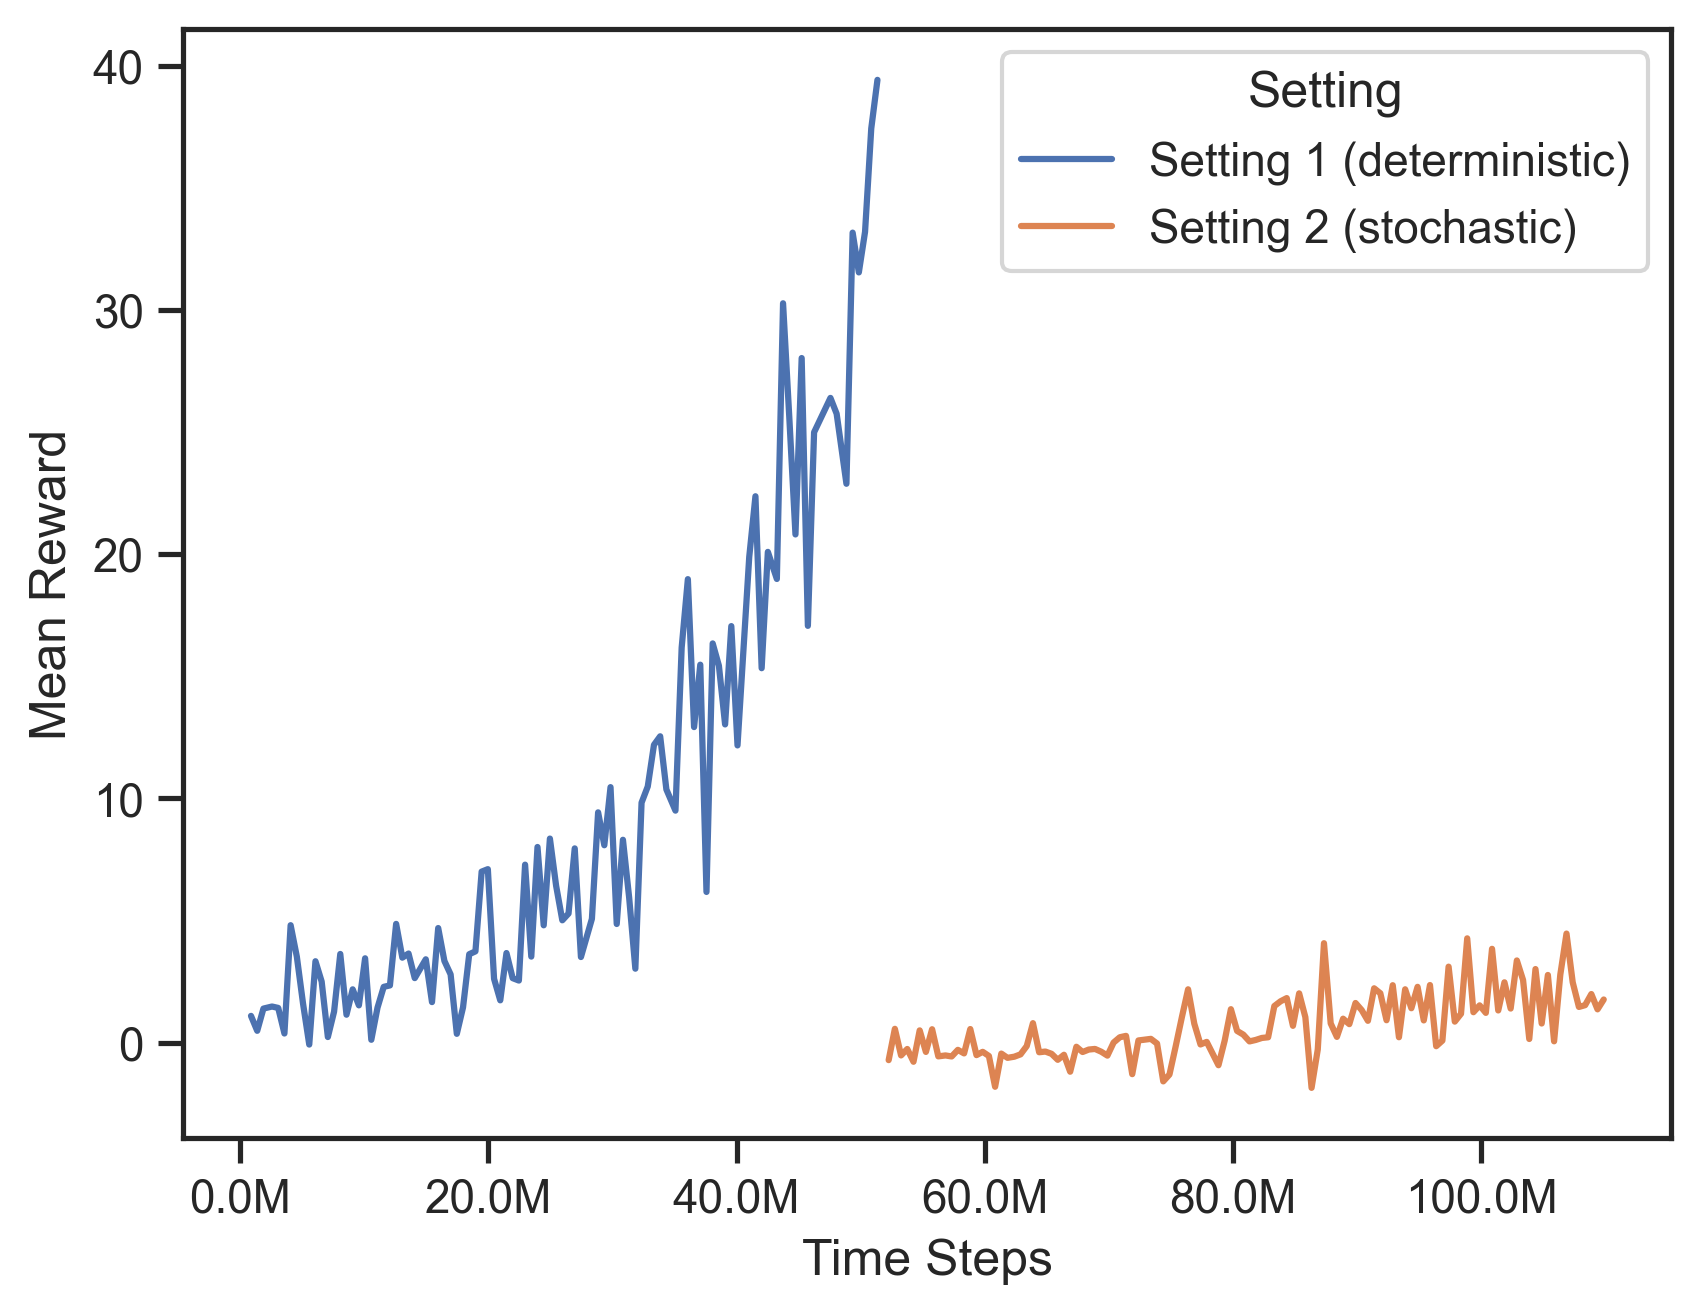

In [8]:
g = sns.lineplot(data=rewards_df_with_settings, x="Step", y="Value",
                 hue="Setting")
g.set(xlabel='Time Steps', ylabel='Mean Reward')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks() / 1000000]
g.set_xticklabels(xlabels)

## Plotting the second reward curve (transfer vs. no transfer)

In [9]:
no_transfer_df = pd.read_csv("./rewards_no_transfer.csv")
no_transfer_df

,Wall time,Step,Value
0,1.670894e+09,954752,-0.402549
1,1.670896e+09,1454752,-0.597728
2,1.670898e+09,1969785,-0.227242
3,1.670900e+09,2470326,-0.397909
4,1.670903e+09,3452822,-0.445106
...,...,...,...
116,1.671139e+09,62838650,3.348011
117,1.671141e+09,63338650,1.201301
118,1.671143e+09,63838650,0.210244
119,1.671144e+09,64338650,1.527211


In [10]:
# Add label to no_transfer_df
no_transfer_labels = ["Without Transfer Learning" for _ in range(no_transfer_df.shape[0])]
no_transfer_df.insert(3, "Model", no_transfer_labels)
no_transfer_df

,Wall time,Step,Value,Model
0,1.670894e+09,954752,-0.402549,Without Transfer Learning
1,1.670896e+09,1454752,-0.597728,Without Transfer Learning
2,1.670898e+09,1969785,-0.227242,Without Transfer Learning
3,1.670900e+09,2470326,-0.397909,Without Transfer Learning
4,1.670903e+09,3452822,-0.445106,Without Transfer Learning
...,...,...,...,...
116,1.671139e+09,62838650,3.348011,Without Transfer Learning
117,1.671141e+09,63338650,1.201301,Without Transfer Learning
118,1.671143e+09,63838650,0.210244,Without Transfer Learning
119,1.671144e+09,64338650,1.527211,Without Transfer Learning


In [11]:
rewards_df_transfer_labels = rewards_df.iloc[97:].copy()
rewards_df_transfer_labels.reset_index(drop=True, inplace=True)
rewards_df_transfer_labels["Step"] = rewards_df_transfer_labels["Step"] - rewards_df_transfer_labels["Step"].iloc[0]
transfer_labels = ["With Transfer Learning" for _ in range(rewards_df_transfer_labels.shape[0])]
rewards_df_transfer_labels.insert(3, "Model", transfer_labels)
rewards_df_transfer_labels

,Wall time,Step,Value,Model
0,1.670958e+09,0.0,-0.719528,With Transfer Learning
1,1.670960e+09,500000.0,0.563083,With Transfer Learning
2,1.670962e+09,1000000.0,-0.526923,With Transfer Learning
3,1.670964e+09,1500000.0,-0.263154,With Transfer Learning
4,1.670965e+09,2000000.0,-0.786499,With Transfer Learning
...,...,...,...,...
110,1.671201e+09,55613817.0,1.459240,With Transfer Learning
111,1.671203e+09,56113817.0,1.532439,With Transfer Learning
112,1.671205e+09,56613817.0,1.986574,With Transfer Learning
113,1.671207e+09,57113817.0,1.360753,With Transfer Learning


In [12]:
with_model_labels_df = pd.concat([no_transfer_df, rewards_df_transfer_labels], ignore_index=True)
with_model_labels_df

,Wall time,Step,Value,Model
0,1.670894e+09,954752.0,-0.402549,Without Transfer Learning
1,1.670896e+09,1454752.0,-0.597728,Without Transfer Learning
2,1.670898e+09,1969785.0,-0.227242,Without Transfer Learning
3,1.670900e+09,2470326.0,-0.397909,Without Transfer Learning
4,1.670903e+09,3452822.0,-0.445106,Without Transfer Learning
...,...,...,...,...
231,1.671201e+09,55613817.0,1.459240,With Transfer Learning
232,1.671203e+09,56113817.0,1.532439,With Transfer Learning
233,1.671205e+09,56613817.0,1.986574,With Transfer Learning
234,1.671207e+09,57113817.0,1.360753,With Transfer Learning


c:\Users\ryanb\OneDrive\Documents\Ryan\School\College 4th Year\Reinforcement Learning\Final Project\.venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


[Text(-10000000.0, 0, '-10.0M'),
 Text(0.0, 0, '0.0M'),
 Text(10000000.0, 0, '10.0M'),
 Text(20000000.0, 0, '20.0M'),
 Text(30000000.0, 0, '30.0M'),
 Text(40000000.0, 0, '40.0M'),
 Text(50000000.0, 0, '50.0M'),
 Text(60000000.0, 0, '60.0M'),
 Text(70000000.0, 0, '70.0M')]

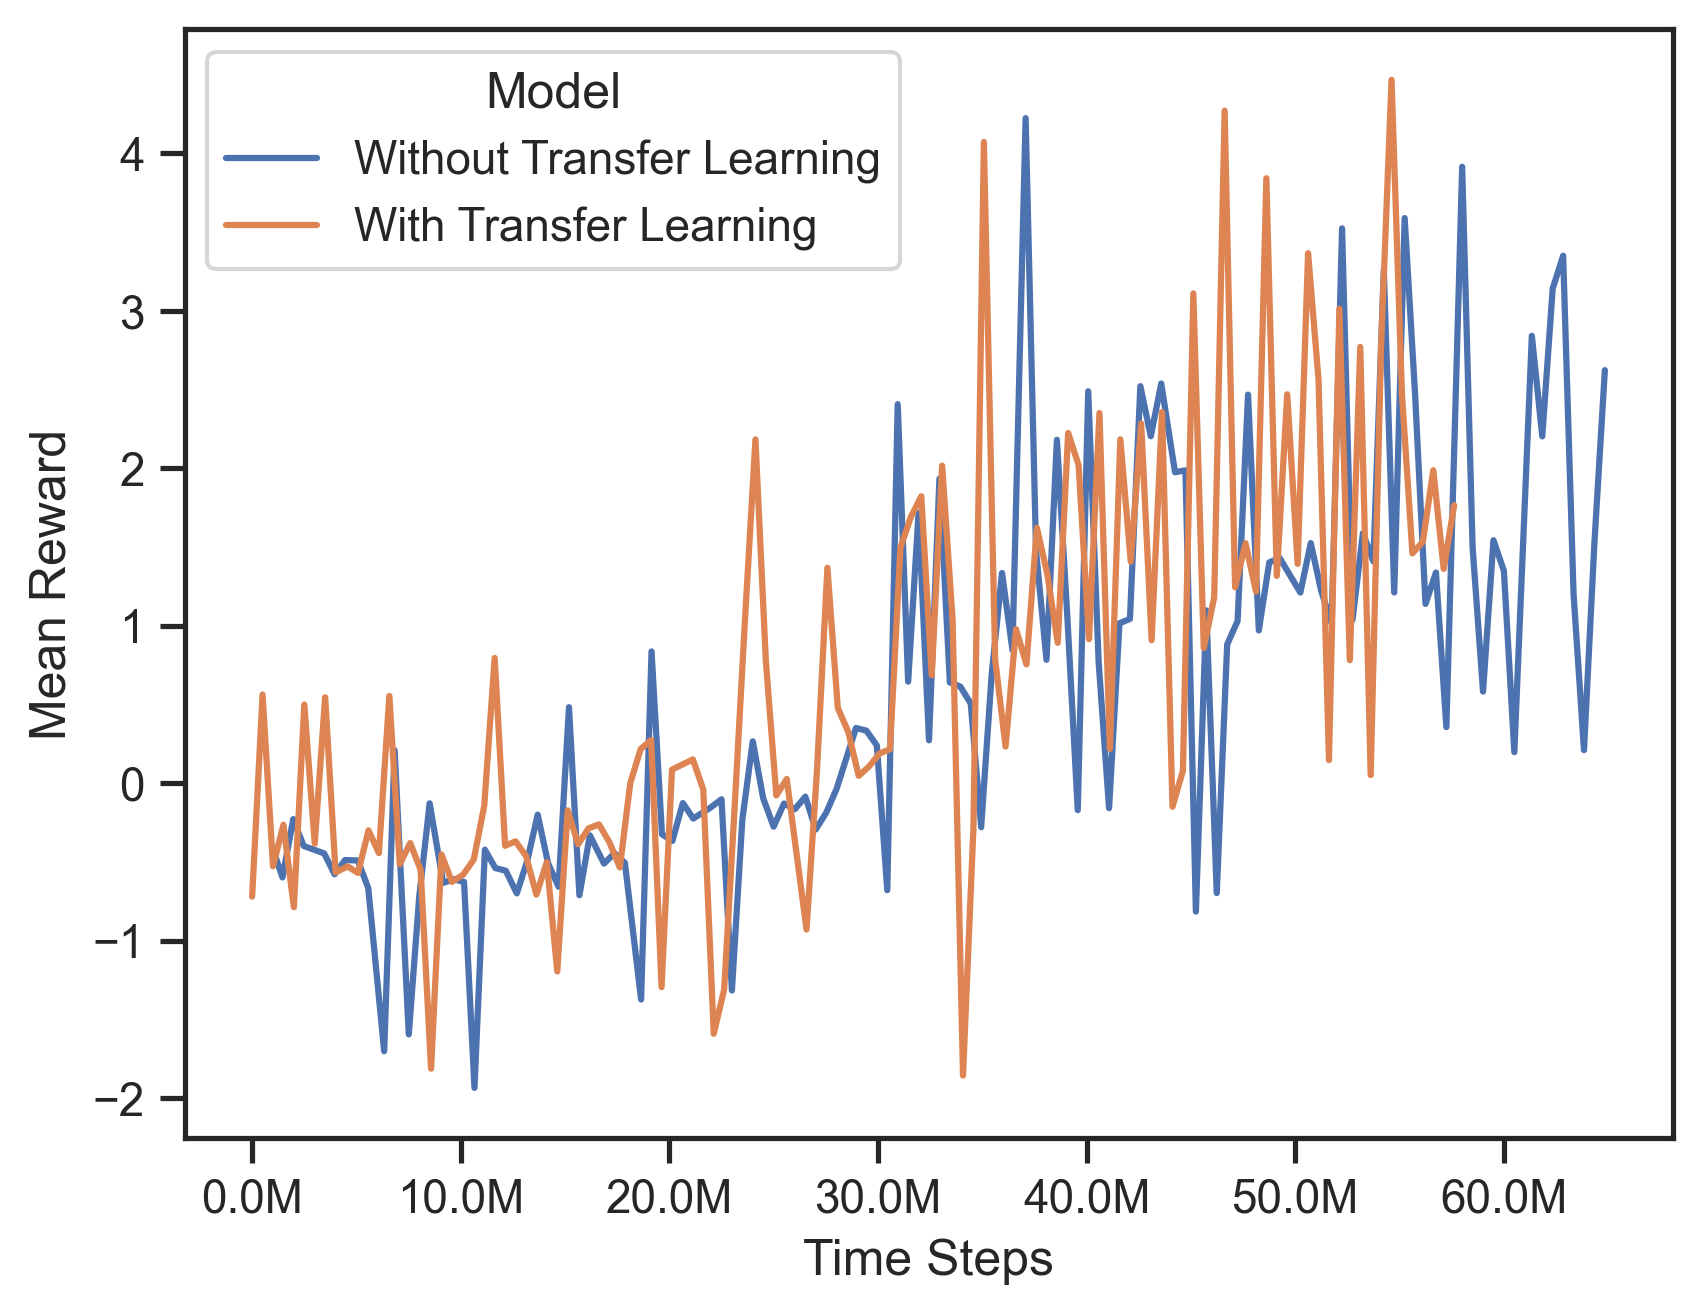

In [13]:
g = sns.lineplot(data=with_model_labels_df, x="Step", y="Value", hue="Model")
g.set(xlabel='Time Steps', ylabel='Mean Reward')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks() / 1000000]
g.set_xticklabels(xlabels)